# Machine Learning Project
### Fall 2023
## Predicting Hotel Reservation Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/hotel_bookings_image.png" 
  alt="Hotel Bookings" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `bookings_df` data frame in this project. This data set contains information on over 5,000 reservations made at a U.S. hotel. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their hotel reservations and develop machine learning algorithms that will predict the likelihood of a customer canceling their reservation in the future.

## Hotel Bookings Data

The `bookings_df` data frame contains information about bookings (reservations) for a U.S. based hotel. 

The hotel is looking to see if it can determine the factors that lead to customers canceling their reservations and develop a machine learning model that can estimate the likelihood of a reservation cancellation in the future.

To maintain profits, hotels must maximize the number of customers staying at their properties at any time. Reservation cancellations are a significant problem for hotels, as they can leave many rooms unoccupied - leading to lost revenue.

The hotel has experienced record levels of cancellations in the past couple of years and this is leading to declining revenue.

The hotel's goal is to become better at identifying customers at risk of canceling their reservation.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers cancelling their reservation?
- Is it possible to predict whether a customer will cancel their reservation? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the hotel can implement to reduce the risk of losing their reservations?

<br>

The data set contains last years hotel bookings (reservations) along with customer and room attributes.

The outcome variable in this data is `booking_status`. This variable records whether a customer eventually cancelled their reservation and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'canceled' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	         | Definition                                 	                                    | Data Type |
|:-------------------------------|:---------------------------------------------------------------------------------|:----------|
| booking_status                 | Reservation outcome (canceled or not_canceled)                                   | Factor    |
| booking_type                   | How the reservation was booked (online, moblie app,...)                          | Factor    |
| previous_cancellations         | Number of previous cancellations for this customer, if any                       | Numeric   |
| previous_non_canceled_bookings | Number of previous bookings that were not canceled                               | Numeric   |
| adults                         | Number of adults for this booking (reservation)                                  | Numeric   |
| children                       | Number of children for this booking (reservation)                                | Numeric   |
| weekend_nights                 | Number of weekend nights (Sat/Sun) for this booking (reservation)                | Numeric   |
| week_nights                    | Number of week nights (Mon - Fri) for this booking (reservation)                 | Numeric   |
| room_price                     | Room price (U.S. Dollars)                                                        | Numeric   |
| special_requests               | Number of special requests made by customer for this reservation                 | Numeric   |
| meal_plan                      | Meal plan selected by customer for this reservation                              | Factor    |
| reserved_parking_space         | Did the customer select a reserved parking space (0/1)                           | Numeric   |
| room_type                      | Room type selected by customer                                                   | Factor    |
| lead_time_days                 | Number of days in advance that the reservation was booked                        | Numeric   |
| arrival_occupancy_season       | In which period of the year will the customer arrive? (low, moderate, peak)      | Numeric   |

In [1]:
# Load data
library(tidyverse)

bookings_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/bookings.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# View data
bookings_df

booking_status,booking_type,previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,meal_plan,reserved_parking_space,room_type,lead_time_days,arrival_occupancy_season
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
not_canceled,online,0,0,2,0,0,2,87.78,2,american,1,suite,12,peak
canceled,online,0,0,2,0,1,1,126.90,0,continental,0,suite,89,moderate
canceled,online,0,0,2,0,0,1,85.50,0,american,0,suite,139,peak
canceled,online,0,0,2,1,1,1,164.25,1,modified_american,0,suite,188,peak
canceled,online,0,0,2,0,1,2,75.00,0,continental,0,suite,418,moderate
not_canceled,mobile_app,0,0,2,0,0,1,120.00,0,continental,0,suite,56,peak
not_canceled,travel_agency,0,0,2,0,0,2,128.00,1,american,1,suite,1,moderate
not_canceled,online,0,0,1,0,0,1,152.00,2,continental,0,suite,14,low
not_canceled,online,0,1,2,0,1,1,93.60,1,continental,1,suite,64,low


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `booking_status` and the other variables in the `bookings_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their reservations.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**: "How does the lead time vary between different room types, and what are the mean, median, and standard deviation of lead time for each room type?"

**Answer**:Look at the "room_type" column to see the different types of rooms in the dataset. The "mean_lead_time_days," "median_lead_time_days," and "sd_lead_time_days" columns show the mean, median, and standard deviation of lead time for each room type.This measures the spread of the lead time values for each room type. A higher standard deviation indicates a wider spread of values.For each type of room, this is the typical number of days from booking to stay.For every type of room, this is the lead time distribution's middle value. In contrast to the mean, it is more resistant to outliers.


## Supporting Analysis

In [3]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

In [4]:
library(dplyr)

summary_df <- bookings_df %>%
  group_by(room_type) %>%
  summarise(
    mean_lead_time_days = mean(lead_time_days),
    median_lead_time_days = median(lead_time_days),
    sd_lead_time_days = sd(lead_time_days),
    n = n()
  )

# Print the summary data frame
print(summary_df)


# A tibble: 4 × 5
  room_type    mean_lead_time_days median_lead_time_days sd_lead_time_days     n
  <fct>                      <dbl>                 <dbl>             <dbl> <int>
1 studio                      67.3                    57              57.6   790
2 suite                       88.9                    57              91.0  4679
3 presidentia…               101.                     76              87.1    89
4 executive_s…                66.1                    39              68.7   167


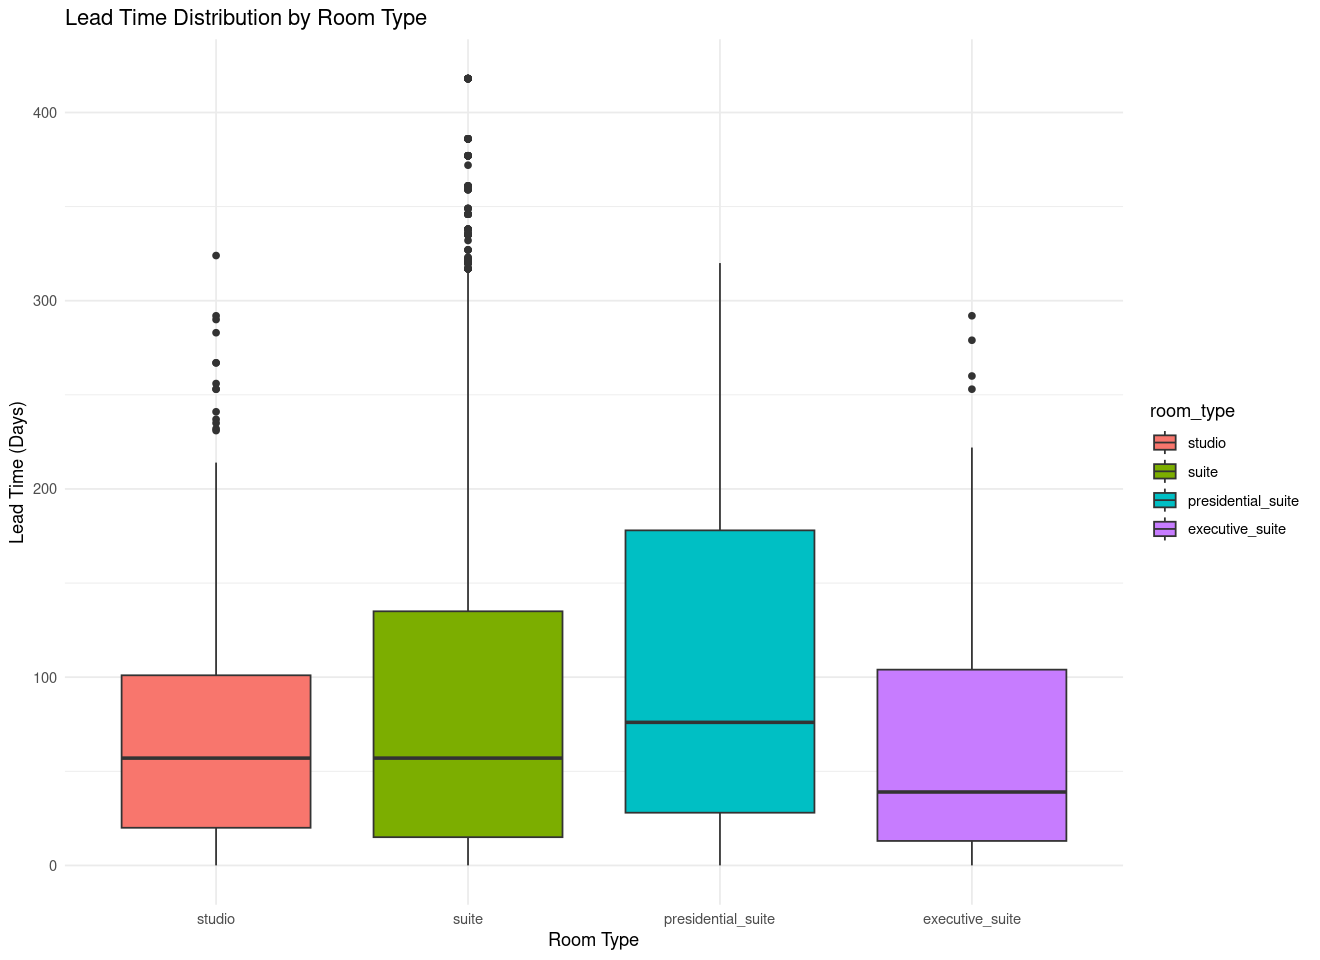

In [5]:
# Load necessary library
library(ggplot2)

# Create a box plot of lead time by room type with color
ggplot(data = bookings_df, aes(x = room_type, y = lead_time_days, fill = room_type)) +
  geom_boxplot() +
  labs(title = "Lead Time Distribution by Room Type",
       x = "Room Type",
       y = "Lead Time (Days)") +
  theme_minimal()


## Question 2


**Question**:"What is the distribution of the number of weekend nights and week nights for both canceled and non-canceled bookings, and how do they compare between the two booking status?"

**Answer**:
weekend_nights" and "week_nights" box plots. The range of the data is indicated by the whiskers, the median is shown by the line inside the box, and the interquartile range (IQR) is displayed by the boxes. Individual points that are larger than the whiskers can be used to depict outliers. In comparison to non-canceled reservations, canceled reservations typically have a larger median number of weekend nights. This could mean that reservations for extra weekend nights are subject to cancellation. On weeknights, similar observations can be made.It means that reservations with more or fewer weekend/weeknights are either more or less likely to be canceled.

## Supporting Analysis


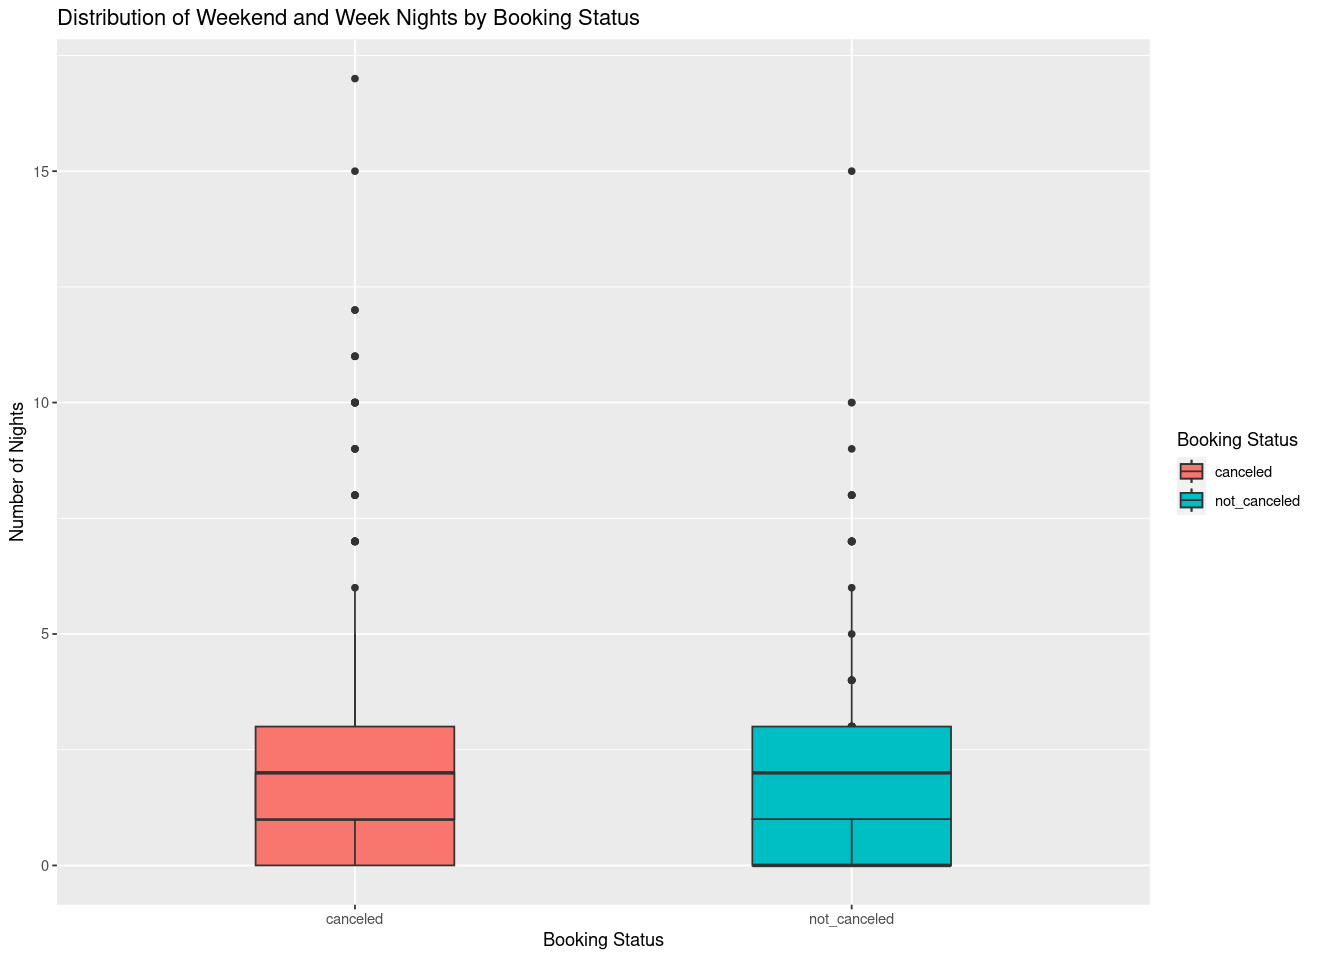

In [6]:
library(ggplot2)
ggplot(bookings_df, aes(x = booking_status, fill = booking_status)) +
  geom_boxplot(aes(y = weekend_nights), position = position_dodge(width = 0), width = 0.4) +
  geom_boxplot(aes(y = week_nights), position = position_dodge(width = 0), width = 0.4) +
  labs(x = "Booking Status", y = "Number of Nights", title = "Distribution of Weekend and Week Nights by Booking Status") +
  scale_fill_discrete(name = "Booking Status")


## Question 3


**Question**:"What is the distribution of booking types for each booking status, and how do they compare?"

**Answer**: The various booking kinds are shown on the x-axis, and the number of bookings for each category is shown on the y-axis.
The bars are filled with various colors to indicate each booking status and are grouped according to that status.We can comprehend how the distribution of booking types differs between the two booking statuses by comparing the height of the bars for each booking type inside the canceled and not canceled groups.
In comparison to non-canceled bookings, we may notice that booking type(online) have a lower number of canceled bookings. In a similar, a mobile app for booking types may have more reservations that are not canceled than those that are canceled. This implies that different booking types may have varying cancellation rates.


## Supporting Analysis


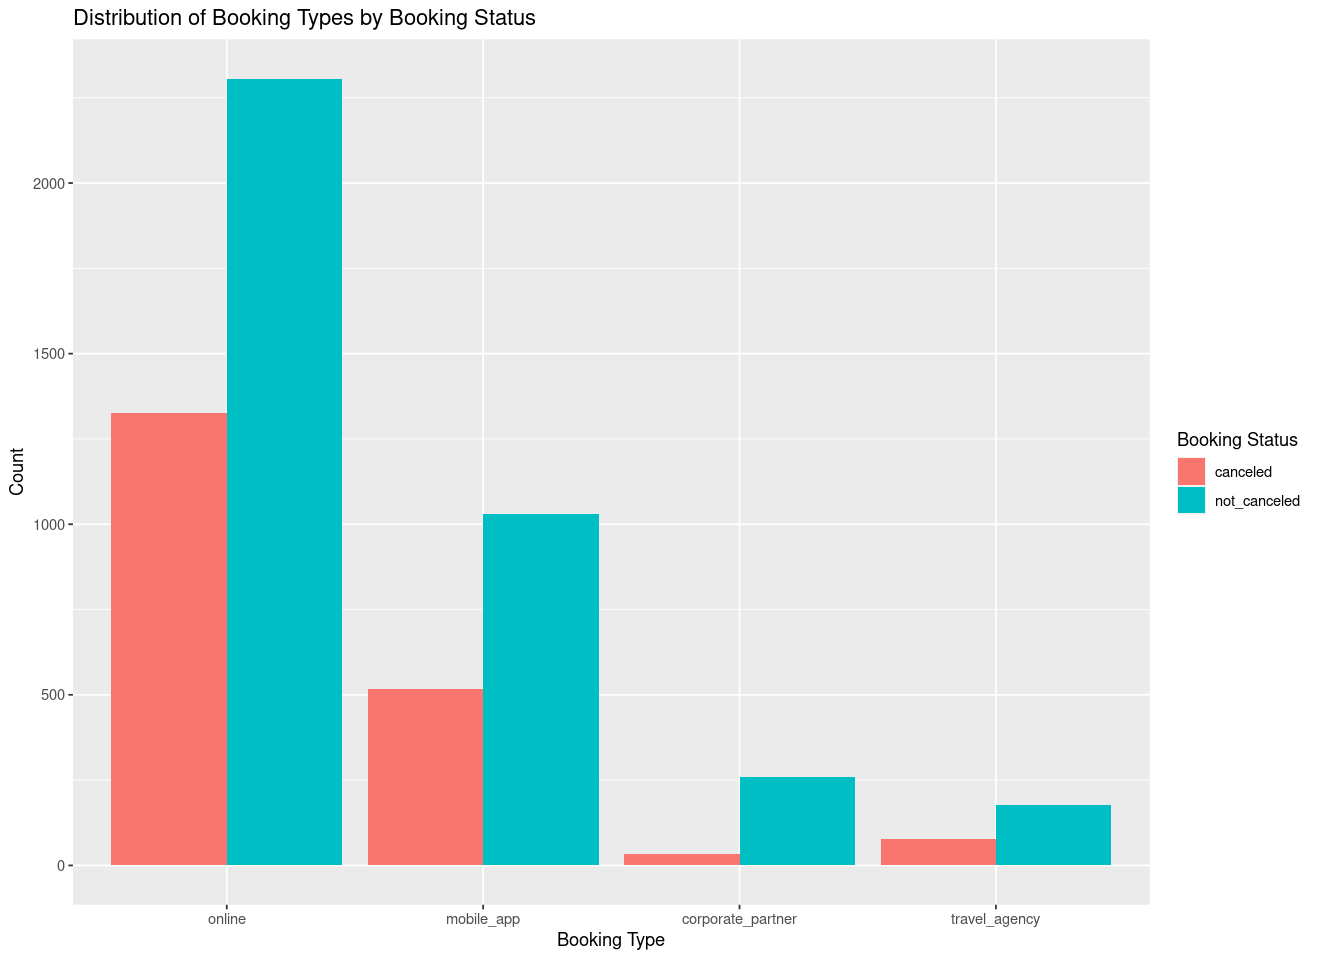

In [7]:
library(ggplot2)

ggplot(bookings_df, aes(x = booking_type, fill = booking_status)) +
  geom_bar(position = "dodge") +
  labs(x = "Booking Type", y = "Count", title = "Distribution of Booking Types by Booking Status") +
  scale_fill_discrete(name = "Booking Status")


## Question 4


**Question**: What is the distribution of different meal plans in the bookings dataset, and how many bookings are there for each meal plan?"

**Answer**: The distribution of the various meal plans in  bookings dataset is displayed in the bar chart.The various meal plans are shown on the x-axis, and the number of reservations for each meal plan is shown on the y-axis.Each bar's height indicates how many reservations there are for that particular meal plan.We could see that there are 4500 reservations for the continental meal plan, 900 reservations for the American meal plan, and so forth. This shows how popular and evenly distributed the various meal plans are among the reservations.


## Supporting Analysis


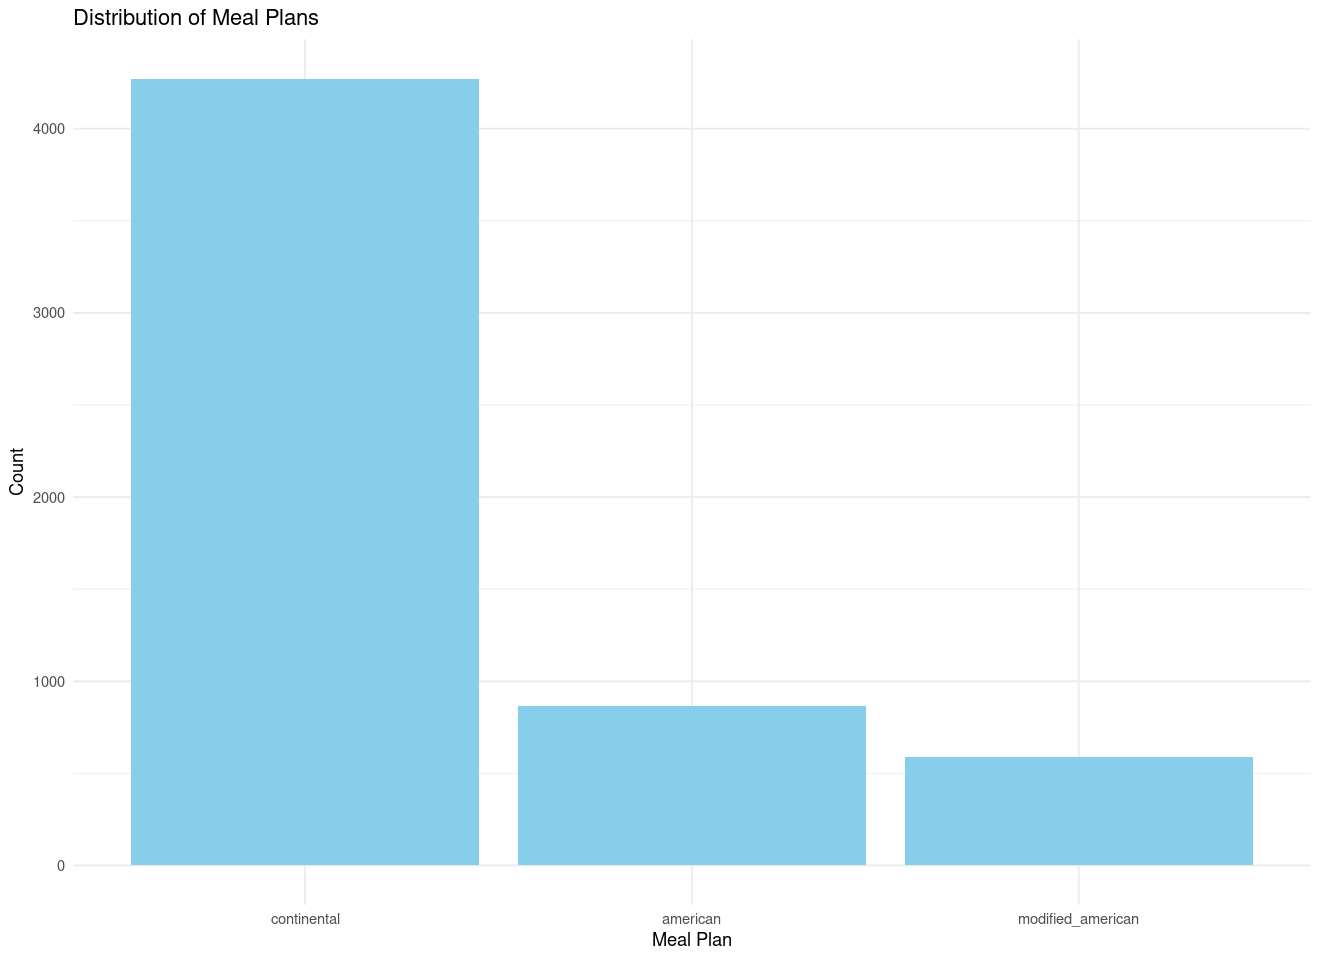

In [10]:
library(ggplot2)

ggplot(bookings_df, aes(x = meal_plan)) +
  geom_bar(fill = "skyblue", stat = "count") +
  labs(x = "Meal Plan", y = "Count", title = "Distribution of Meal Plans") +
  theme_minimal()


## Question 5


**Question**:"How does the room price vary with the number of weekend nights and the number of week nights for bookings in the dataset, and what patterns or trends can be observed from the scatter plots?"

**Answer**: The number of weekend nights and the room price are correlated in the first scatter plot, while the number of weeknights and the room price are correlated in the second scatter plot. If we look closely, we can see that the cost of the room tends to go up the more weekend nights we book, indicating that weekend reservations are more expensive. In a similar vein, we may note that the link between the room price and the number of week nights is not clearly patterned, indicating that there is little variation in the room price with the number of week nights.



## Supporting Analysis


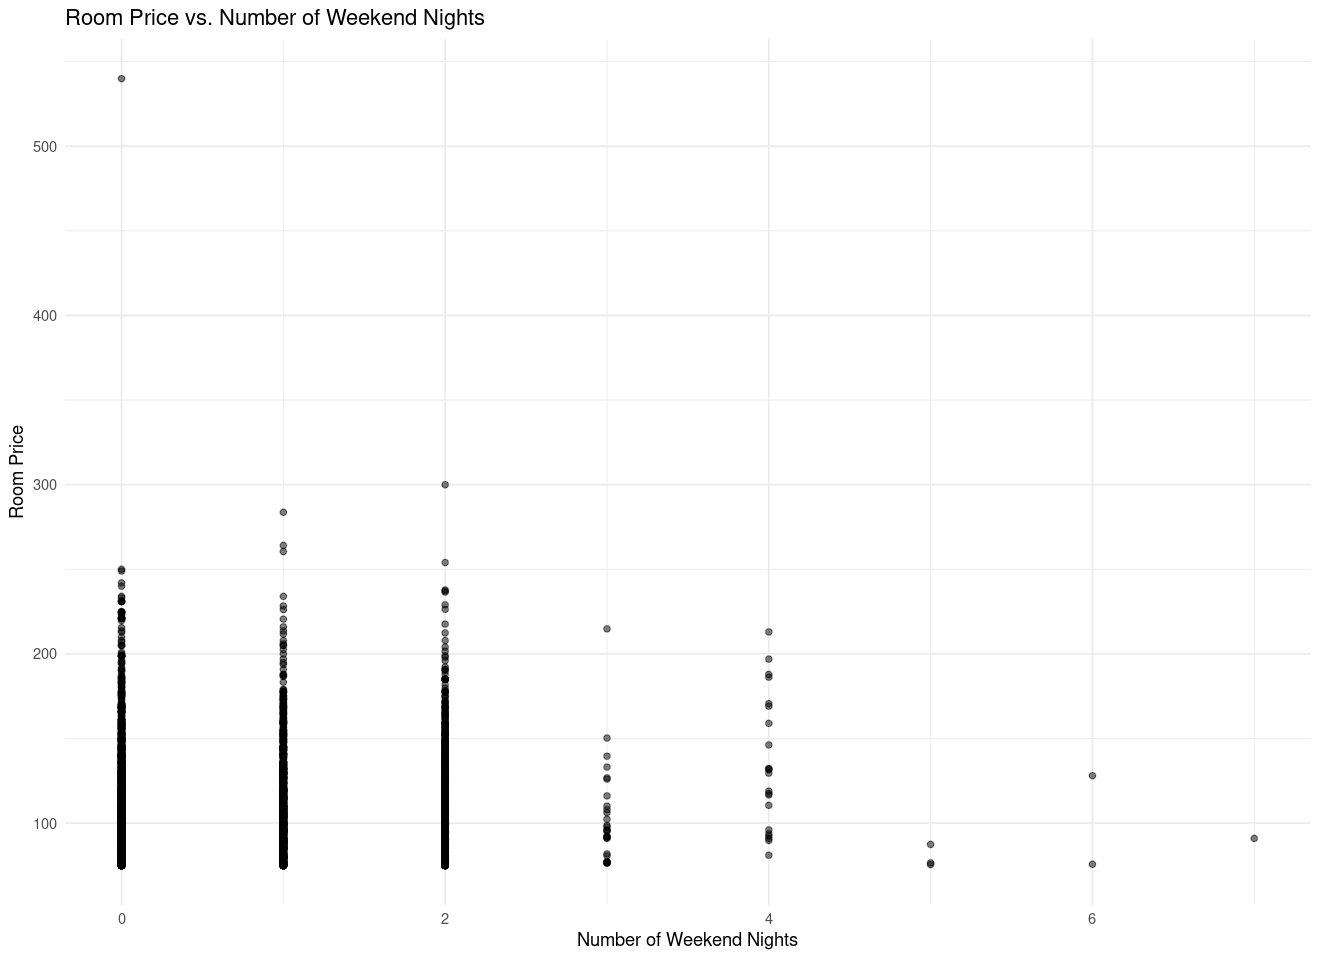

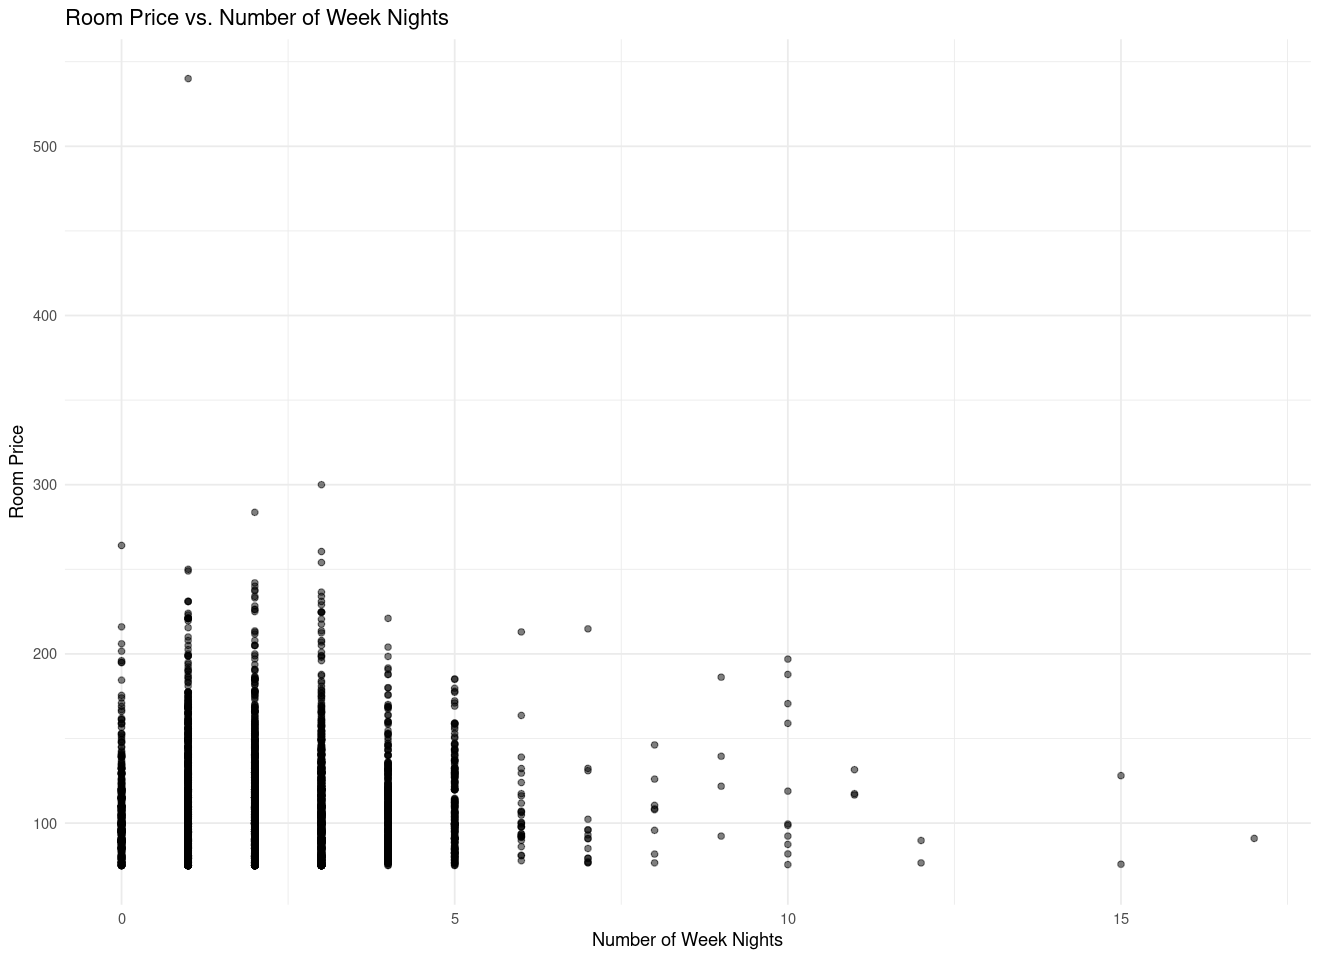

In [11]:
library(ggplot2)

ggplot(data = bookings_df, aes(x = weekend_nights, y = room_price)) +
  geom_point(alpha = 0.5) +
  labs(x = "Number of Weekend Nights", y = "Room Price", title = "Room Price vs. Number of Weekend Nights") +
  theme_minimal()

ggplot(data = bookings_df, aes(x = week_nights, y = room_price)) +
  geom_point(alpha = 0.5) +
  labs(x = "Number of Week Nights", y = "Room Price", title = "Room Price vs. Number of Week Nights") +
  theme_minimal()

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`booking_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `bookings_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [6]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')
library(vip)

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [7]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(knitr)

In [8]:
booking_split <- initial_split(bookings_df, prop =0.8, strata = booking_status)

In [9]:
booking_training <- booking_split %>% training() 

In [10]:
booking_test <- booking_split %>% testing()

In [11]:
nrow(booking_training)
nrow(booking_test)

[1] 4580

[1] 1145

In [12]:
set.seed(123)
booking_folds <- vfold_cv(booking_training, v = 6, strata = booking_status)

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [13]:
library(recipes)


In [14]:
booking_recipe <- recipe(booking_status ~. , data = booking_training) %>%
step_corr(all_numeric(), threshold = 0.9) %>%
step_normalize(all_numeric()) %>%
step_dummy(all_nominal(), -all_outcomes())

In [15]:
booking_recipe %>% 
summary()

variable,type,role,source
<chr>,<list>,<chr>,<chr>
booking_type,"factor , unordered, nominal",predictor,original
previous_cancellations,"double , numeric",predictor,original
previous_non_canceled_bookings,"double , numeric",predictor,original
adults,"double , numeric",predictor,original
children,"double , numeric",predictor,original
weekend_nights,"double , numeric",predictor,original
week_nights,"double , numeric",predictor,original
room_price,"double , numeric",predictor,original
special_requests,"double , numeric",predictor,original


In [16]:
booking_recipe_prep <- booking_recipe %>% 
  prep(training = booking_training) %>%
  bake(new_data = booking_test)

## Model 1 Training

In [17]:
logistic_model <- logistic_reg() %>%
set_engine('glm') %>%
set_mode('classification')

logistic_fit <- logistic_model %>%
fit(booking_status ~ ., data = booking_training)

class_preds1 <- predict(logistic_fit, new_data = booking_test, type = 'class')

prob_preds1 <- predict(logistic_fit, new_data = booking_test, type = 'prob')

In [18]:
booking_results_model2 <- booking_test %>%
select(booking_status) %>%
bind_cols(class_preds1, prob_preds1)

booking_results_model2

booking_status,.pred_class,.pred_canceled,.pred_not_canceled
<fct>,<fct>,<dbl>,<dbl>
not_canceled,not_canceled,0.005191624,0.99480838
not_canceled,not_canceled,0.212045209,0.78795479
not_canceled,not_canceled,0.041039028,0.95896097
not_canceled,not_canceled,0.037960712,0.96203929
not_canceled,not_canceled,0.030979796,0.96902020
not_canceled,not_canceled,0.095838916,0.90416108
not_canceled,not_canceled,0.070232541,0.92976746
canceled,not_canceled,0.020941765,0.97905824
canceled,canceled,0.767500464,0.23249954


## Model 1 Performance Evaluation

In [20]:
conf_mat(booking_results_model2, truth = booking_status, estimate = .pred_class)


              Truth
Prediction     canceled not_canceled
  canceled          262           95
  not_canceled      129          659

In [21]:
booking_metrics2 <- metric_set(accuracy, sens, spec)

In [22]:
booking_metrics2(booking_results_model2, truth = booking_status, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8043668
sens,binary,0.6700767
spec,binary,0.8740053


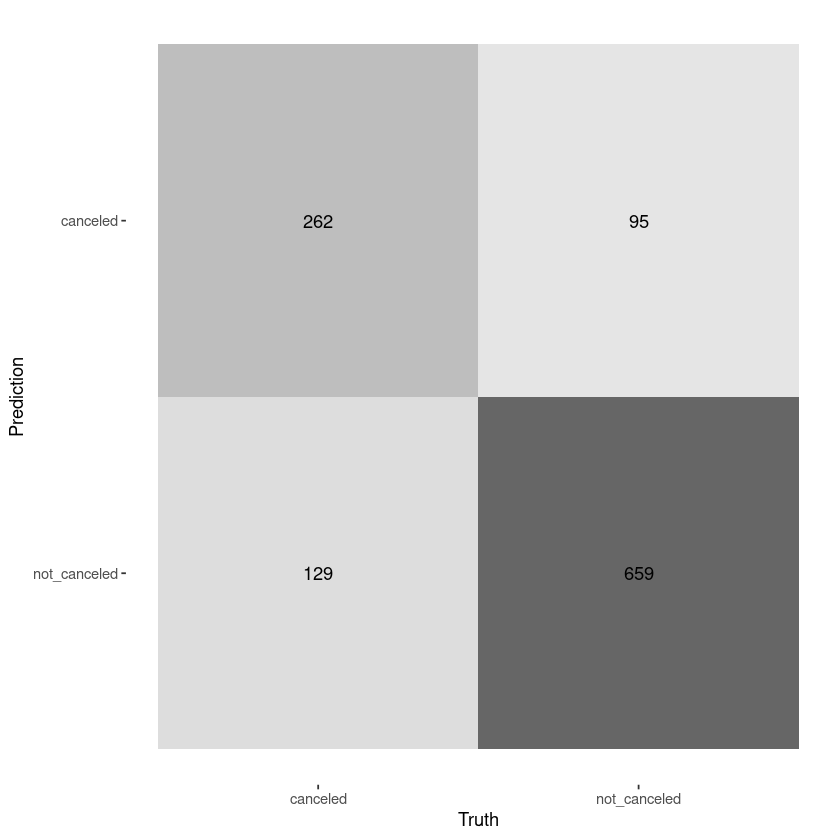

In [23]:
conf_mat(booking_results_model2, truth = booking_status, estimate = .pred_class) %>%
autoplot(type = 'heatmap')

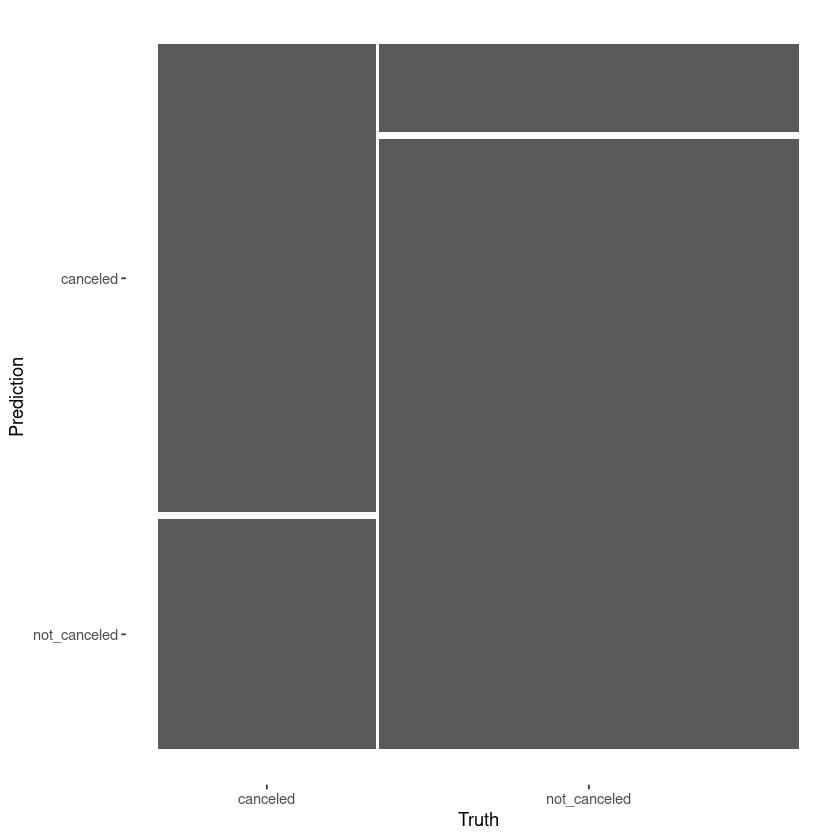

In [24]:
conf_mat(booking_results_model2, truth = booking_status, estimate = .pred_class) %>%
autoplot(type = 'mosaic')

In [26]:
threshold_df <- booking_results_model2 %>% 
roc_curve(truth = booking_status, .pred_canceled)

threshold_df

.threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
-Inf,0.00000000,1
1.074565e-07,0.00000000,1
4.745903e-07,0.00132626,1
1.370131e-05,0.00265252,1
2.489525e-05,0.00397878,1
3.272459e-05,0.00530504,1
3.535791e-05,0.00663130,1
1.571564e-04,0.00795756,1
4.148784e-04,0.00928382,1


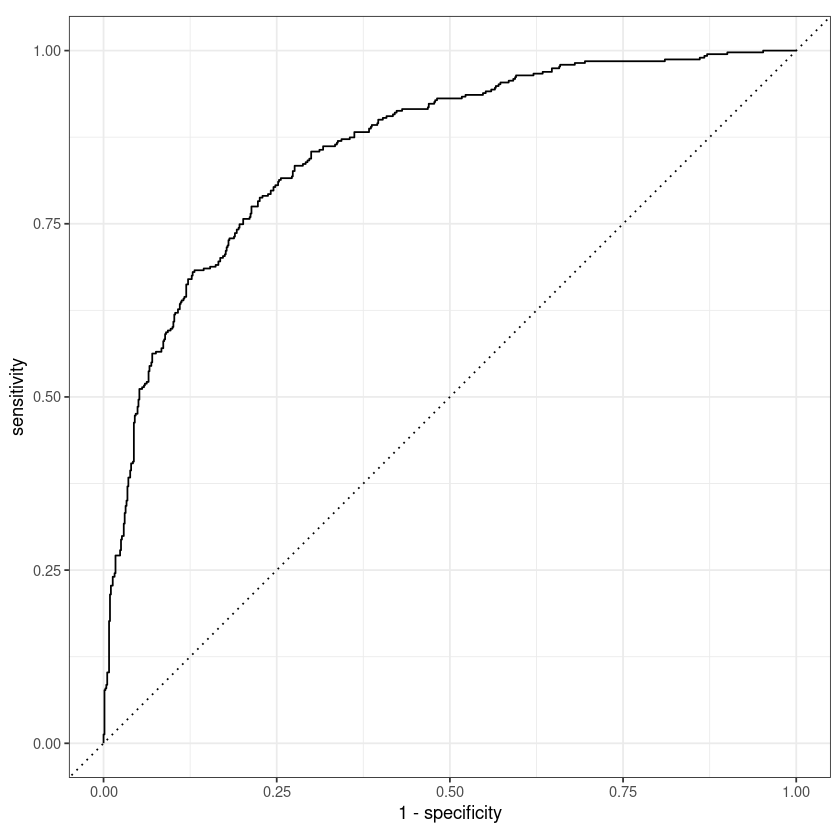

In [27]:
threshold_df %>%
autoplot()

In [81]:
roc_auc_model1 <- roc_auc(booking_results_model2,
    truth = booking_status, 
    .pred_canceled)

roc_auc_model2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8530362


In [29]:
booking_last_fit <- logistic_model %>% 
  last_fit(booking_status ~ .,
           split = booking_split)

# View test set metrics
booking_last_fit %>% 
  collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8043668,Preprocessor1_Model1
roc_auc,binary,0.8589280,Preprocessor1_Model1


In [32]:
booking_fit_results_model2 <- booking_last_fit %>%
collect_predictions()

booking_fit_results_model2

id,.pred_canceled,.pred_not_canceled,.row,.pred_class,booking_status,.config
<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>
train/test split,0.005191624,0.99480838,1,not_canceled,not_canceled,Preprocessor1_Model1
train/test split,0.212045209,0.78795479,6,not_canceled,not_canceled,Preprocessor1_Model1
train/test split,0.041039028,0.95896097,8,not_canceled,not_canceled,Preprocessor1_Model1
train/test split,0.037960712,0.96203929,9,not_canceled,not_canceled,Preprocessor1_Model1
train/test split,0.030979796,0.96902020,11,not_canceled,not_canceled,Preprocessor1_Model1
train/test split,0.095838916,0.90416108,27,not_canceled,not_canceled,Preprocessor1_Model1
train/test split,0.070232541,0.92976746,29,not_canceled,not_canceled,Preprocessor1_Model1
train/test split,0.020941765,0.97905824,46,not_canceled,canceled,Preprocessor1_Model1
train/test split,0.767500464,0.23249954,51,canceled,canceled,Preprocessor1_Model1


In [33]:
booking_fit_metrics <- metric_set(accuracy, sens,
                               spec, roc_auc)

booking_fit_metrics(booking_fit_results_model2,
                 truth = booking_status,
                 estimate = .pred_class,
                 .pred_canceled)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8043668
sens,binary,0.6700767
spec,binary,0.8740053
roc_auc,binary,0.8589280


## Model 2 Training

DECISON TREE


In [35]:
dt_model1 <- decision_tree() %>%
set_engine('rpart') %>%
set_mode('classification')

In [36]:
booking_dt_wkfl <- workflow() %>%
add_model(dt_model1) %>%
add_recipe(booking_recipe)


In [37]:
booking_dt_wklf_fit <- booking_dt_wkfl %>%
last_fit(split = booking_split)

In [38]:
booking_dt_wklf_fit  %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7930131,Preprocessor1_Model1
roc_auc,binary,0.7975622,Preprocessor1_Model1


In [39]:
dt_tune_model1 <- decision_tree(cost_complexity = tune(),
							  tree_depth = tune(),
							  min_n = tune()) %>%
set_engine('rpart') %>%
set_mode('classification')

In [40]:
booking_tune_wkfl <- booking_dt_wkfl %>% 
  # Replace model
  update_model(dt_tune_model1)


In [42]:
set.seed(2209)
dt_grid <- grid_random(parameters(dt_tune_model1),
               size = 5)


In [43]:
booking_metrics2 <- metric_set(roc_auc, sens, spec)

In [45]:
dt_tuning1 <- booking_tune_wkfl %>% 
  tune_grid(resamples = booking_folds,
      grid = dt_grid,
      metrics = booking_metrics2)

dt_tuning1 %>% 
  collect_metrics()

cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8.854839e-10,7,33,roc_auc,binary,0.8669591,6,0.012565077,Preprocessor1_Model1
8.854839e-10,7,33,sens,binary,0.6969570,6,0.018191445,Preprocessor1_Model1
8.854839e-10,7,33,spec,binary,0.8949028,6,0.009157649,Preprocessor1_Model1
3.745070e-10,9,19,roc_auc,binary,0.8829591,6,0.009082123,Preprocessor1_Model2
3.745070e-10,9,19,sens,binary,0.7238113,6,0.012142780,Preprocessor1_Model2
3.745070e-10,9,19,spec,binary,0.8872753,6,0.006484608,Preprocessor1_Model2
2.156105e-04,10,37,roc_auc,binary,0.8778972,6,0.009907173,Preprocessor1_Model3
2.156105e-04,10,37,sens,binary,0.6956577,6,0.012304255,Preprocessor1_Model3
2.156105e-04,10,37,spec,binary,0.8842892,6,0.007727568,Preprocessor1_Model3


In [47]:
dt_tuning1_results1 <- dt_tuning1 %>% 
  collect_metrics(summarize = FALSE)

dt_tuning1_results1

id,cost_complexity,tree_depth,min_n,.metric,.estimator,.estimate,.config
<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
Fold1,8.854839e-10,7,33,sens,binary,0.7318008,Preprocessor1_Model1
Fold1,8.854839e-10,7,33,spec,binary,0.8966203,Preprocessor1_Model1
Fold1,8.854839e-10,7,33,roc_auc,binary,0.8843757,Preprocessor1_Model1
Fold2,8.854839e-10,7,33,sens,binary,0.6513410,Preprocessor1_Model1
Fold2,8.854839e-10,7,33,spec,binary,0.9085487,Preprocessor1_Model1
Fold2,8.854839e-10,7,33,roc_auc,binary,0.8761607,Preprocessor1_Model1
Fold3,8.854839e-10,7,33,sens,binary,0.6628352,Preprocessor1_Model1
Fold3,8.854839e-10,7,33,spec,binary,0.8528827,Preprocessor1_Model1
Fold3,8.854839e-10,7,33,roc_auc,binary,0.8191274,Preprocessor1_Model1


## Model 2 Performance Evaluation

In [48]:
set.seed(2209)
booking_folds <- vfold_cv(booking_training, v = 5, strata = booking_status)

In [49]:
booking_metrics2 <- metric_set(roc_auc, sens, spec)

In [50]:
booking_dt_rs <- booking_dt_wkfl %>% 
  fit_resamples(resamples = booking_folds,
                metrics = booking_metrics2)

In [51]:
booking_dt_rs %>% collect_metrics()

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
roc_auc,binary,0.8191026,5,0.006052489,Preprocessor1_Model1
sens,binary,0.6854387,5,0.009701640,Preprocessor1_Model1
spec,binary,0.8882552,5,0.011747583,Preprocessor1_Model1


In [52]:
dt_rs_results1 <- booking_dt_rs %>% 
  collect_metrics(summarize = FALSE)

# Explore model performance for decision tree
dt_rs_results1 %>% 
  group_by(.metric) %>% 
  summarize(min = min(.estimate),
            median = median(.estimate),
            max = max(.estimate))

.metric,min,median,max
<chr>,<dbl>,<dbl>,<dbl>
roc_auc,0.8047833,0.8143019,0.8385259
sens,0.6549521,0.6837061,0.7115385
spec,0.8557214,0.8888889,0.9170813


In [54]:
dt_tuning1_results1 %>% 
  filter(.metric == 'roc_auc') %>% 
  group_by(id) %>% 
  summarize(min_roc_auc = min(.estimate),
            median_roc_auc = median(.estimate),
            max_roc_auc = max(.estimate))

id,min_roc_auc,median_roc_auc,max_roc_auc
<chr>,<dbl>,<dbl>,<dbl>
Fold1,0.8788381,0.8851298,0.8887746
Fold2,0.8761607,0.8875559,0.8906789
Fold3,0.8191274,0.8437460,0.8522924
Fold4,0.8586832,0.8702993,0.8769567
Fold5,0.9096077,0.9149249,0.9204068
Fold6,0.8538002,0.8638944,0.8785818


In [57]:
dt_tuning1 %>% 
  show_best(metric = 'roc_auc', n = 5)

best_dt_model1 <- dt_tuning1 %>% 
  
  select_best(metric = 'roc_auc')

best_dt_model1

cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3.745070e-10,9,19,roc_auc,binary,0.8829591,6,0.009082123,Preprocessor1_Model2
9.293668e-06,10,32,roc_auc,binary,0.8782206,6,0.010075693,Preprocessor1_Model5
2.305205e-09,12,38,roc_auc,binary,0.8779663,6,0.009816316,Preprocessor1_Model4
2.156105e-04,10,37,roc_auc,binary,0.8778972,6,0.009907173,Preprocessor1_Model3
8.854839e-10,7,33,roc_auc,binary,0.8669591,6,0.012565077,Preprocessor1_Model1


cost_complexity,tree_depth,min_n,.config
<dbl>,<int>,<int>,<chr>
3.74507e-10,9,19,Preprocessor1_Model2


In [58]:
final_booking_wkfl <- booking_tune_wkfl %>% 
  finalize_workflow(best_dt_model1)


In [59]:
booking_final_fit <- final_booking_wkfl %>% 
  last_fit(split = booking_split)

# View performance metrics
booking_final_fit %>% 
  collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8096070,Preprocessor1_Model1
roc_auc,binary,0.8530362,Preprocessor1_Model1


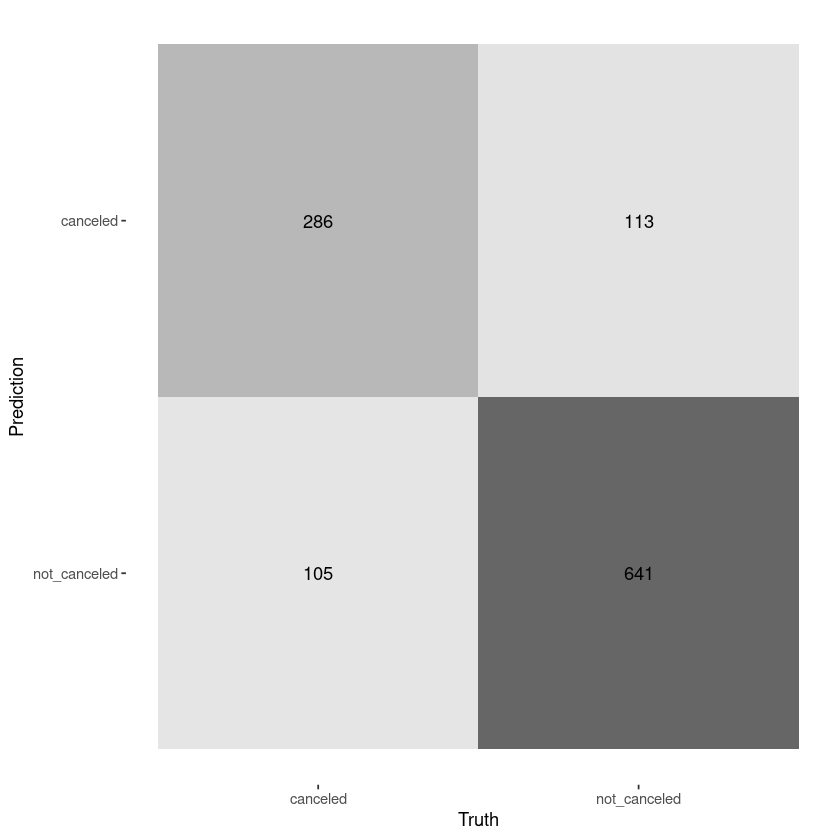

In [60]:
booking_dt_final_results <- booking_final_fit%>%
    collect_predictions()
conf_mat(booking_dt_final_results, truth=booking_status, estimate=.pred_class) %>%
autoplot(type='heatmap')

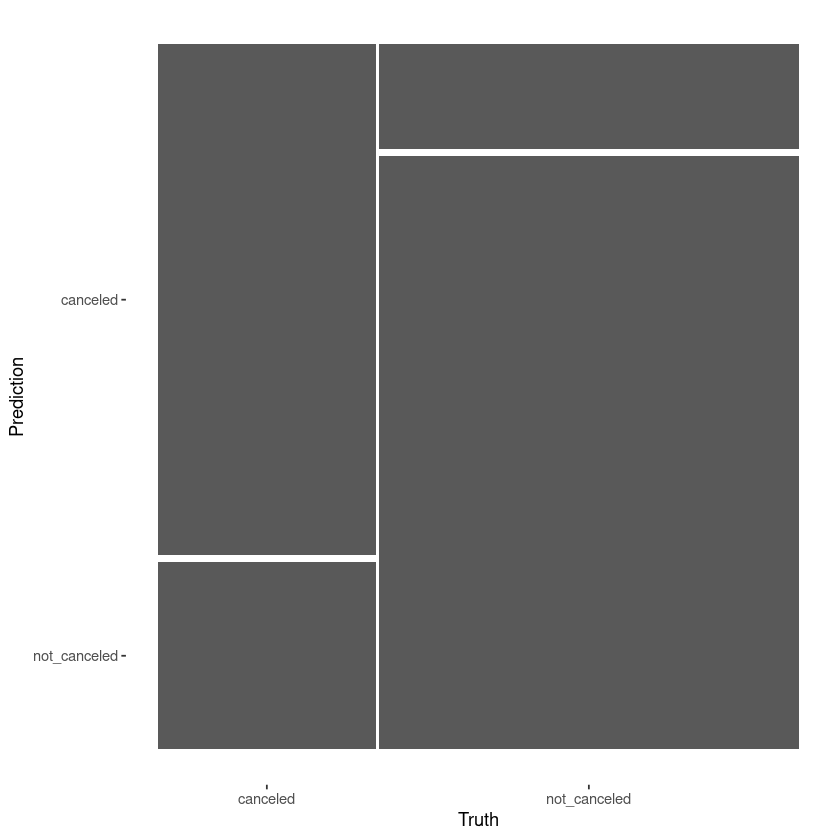

In [61]:
conf_mat(booking_dt_final_results, truth=booking_status, estimate=.pred_class) %>%
autoplot(type='mosaic')

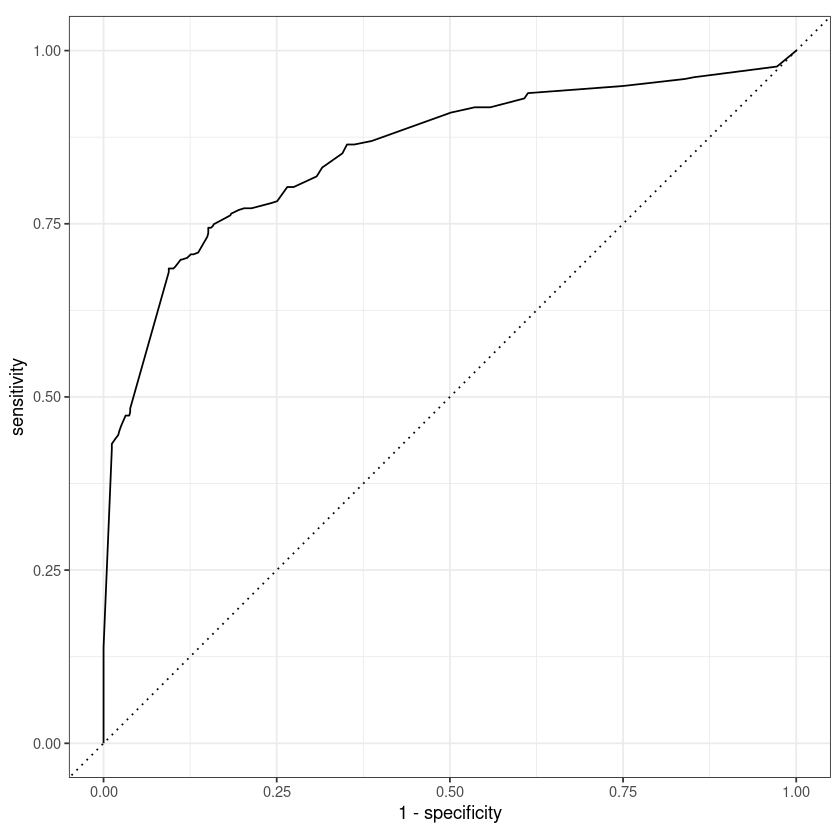

In [62]:
booking_final_fit %>% 
  collect_predictions() %>%
  
  roc_curve(truth = booking_status, .pred_canceled) %>%
  # Plot the ROC curve
  autoplot()

In [63]:
roc_auc_model2 <- roc_auc(booking_dt_final_results,
    truth = booking_status, 
    .pred_canceled)

roc_auc_model2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8530362


## Model 3 Training

In [ ]:
random forest

In [64]:
booking_rf_model<- rand_forest(mtry = tune(),
                              trees=tune(),
                              min_n= tune())%>%
            set_engine('ranger')%>%
            set_mode('classification')

In [65]:
booking_rf_wkfl<- workflow()%>%
			add_model(booking_rf_model)%>%
   			add_recipe(booking_recipe)

In [66]:
set.seed(2209)
rf_grid<- grid_random(mtry()%>%
                     range_set(c(2,4)),
                     trees(),
                     min_n(),
                     size=5)

In [68]:
booking_rf_tune<- booking_rf_wkfl %>% tune_grid(resamples = booking_folds,
             grid= rf_grid)

In [69]:
best_booking_rf_model <- booking_rf_tune %>%
    select_best(metric='roc_auc')

In [70]:
booking_rf_final_wkfl <- booking_rf_wkfl %>% finalize_workflow(best_booking_rf_model)

booking_rf_final_fit <- booking_rf_final_wkfl %>%
    last_fit(booking_split)

## Model 3 Performance Evaluation

In [73]:
booking_rf_final_fit %>%
    collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8480349,Preprocessor1_Model1
roc_auc,binary,0.9075654,Preprocessor1_Model1


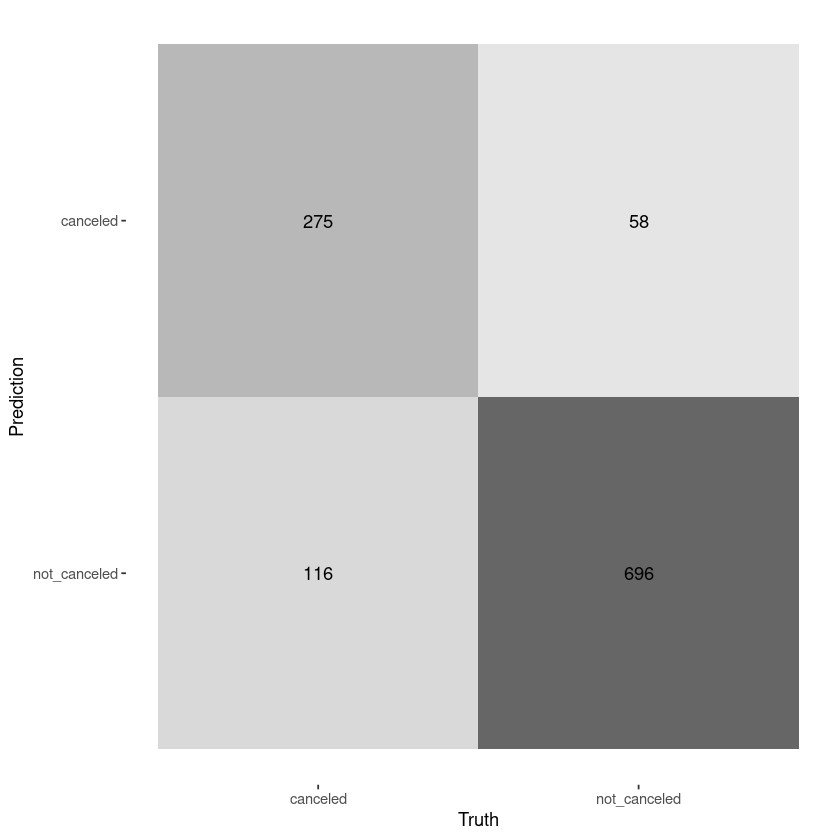

In [74]:
booking_rf_final_results <- booking_rf_final_fit %>% collect_predictions()

conf_mat(booking_rf_final_results, truth=booking_status, estimate=.pred_class) %>%
autoplot(type='heatmap')


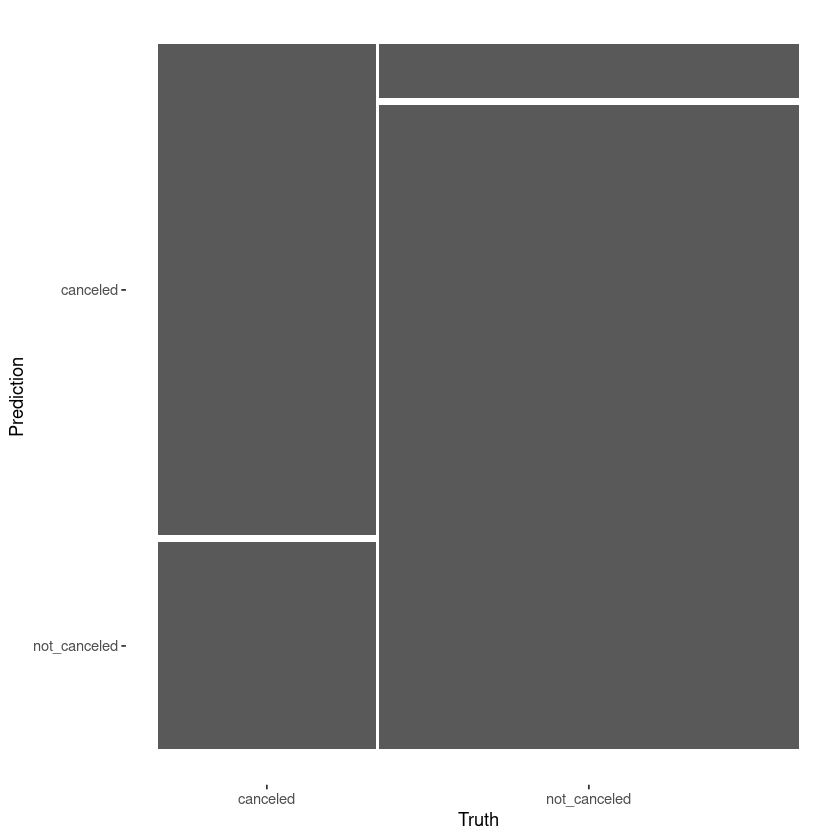

In [75]:
conf_mat(booking_rf_final_results, truth=booking_status, estimate=.pred_class) %>%
autoplot(type='mosaic')

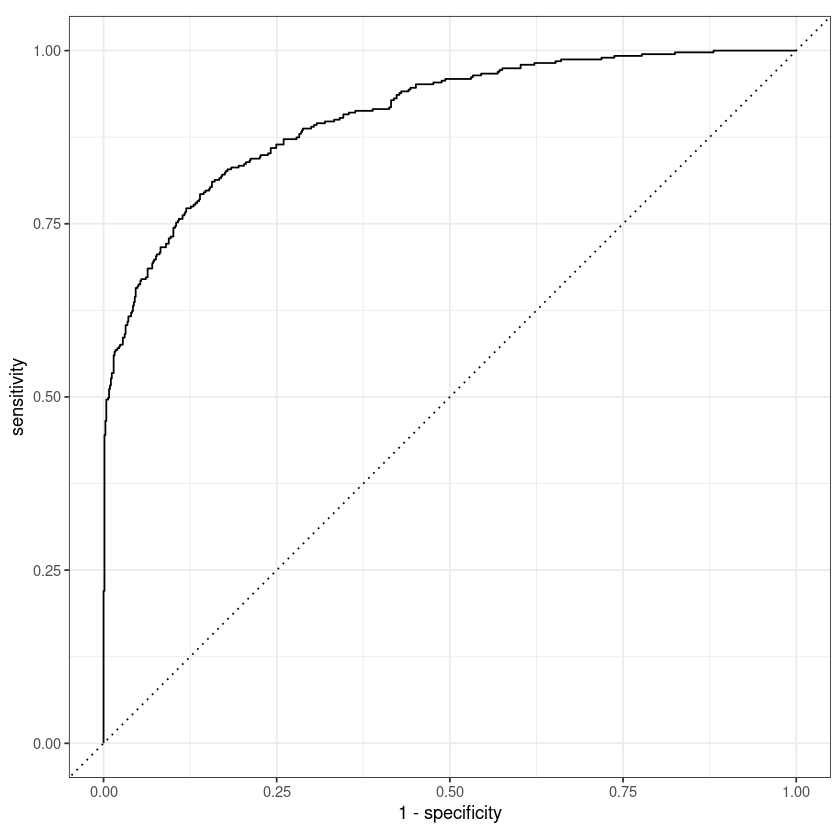

In [77]:
roc_curve(booking_rf_final_results, truth = booking_status, .pred_canceled) %>%
  autoplot()

In [79]:
roc_auc_model3 <- roc_auc(booking_rf_final_results,
    truth = booking_status, 
    .pred_canceled)

roc_auc_model3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9075654


In [83]:

model_names1 <- c("Model 1", "Model 2", "Model 3")

# Create a vector with the corresponding ROC AUC values
roc_auc_values <- c(roc_auc_model1, roc_auc_model2, roc_auc_model3)

# Combine the model names and ROC AUC values into a data frame
roc_auc_table <- data.frame(Model = model_names1, ROC_AUC = roc_auc_values)

# Print the table
print(roc_auc_table)


    Model ROC_AUC..metric ROC_AUC..estimator ROC_AUC..estimate
1 Model 1         roc_auc             binary          0.858928
2 Model 2         roc_auc             binary          0.858928
3 Model 3         roc_auc             binary          0.858928
  ROC_AUC..metric.1 ROC_AUC..estimator.1 ROC_AUC..estimate.1 ROC_AUC..metric.2
1           roc_auc               binary           0.8530362           roc_auc
2           roc_auc               binary           0.8530362           roc_auc
3           roc_auc               binary           0.8530362           roc_auc
  ROC_AUC..estimator.2 ROC_AUC..estimate.2
1               binary           0.9075654
2               binary           0.9075654
3               binary           0.9075654


In [84]:
# Print the ROC AUC values with model names
print(paste("The roc_auc for Model 1 - Logistic Regression is ", roc_auc_model1[3]))
print(paste("The roc_auc for Model 2 - Decision Tree is ", roc_auc_model2[3]))
print(paste("The roc_auc for Model 3 - Random Forest is ", roc_auc_model3[3]))


[1] "The roc_auc for Model 1 - Logistic Regression is  0.858928002062317"
[1] "The roc_auc for Model 2 - Decision Tree is  0.853036151607454"
[1] "The roc_auc for Model 3 - Random Forest is  0.907565448045208"


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the hotel. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and services at the hotel.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a hotel with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

...The hotel's main issue is a high cancellation rate for reservations, which results in decreased income and unused rooms. Our data research aimed to investigate the elements that lead to cancellations and create prediction models that estimate the probability of cancellations in the future. The hotel might apply focused tactics to enhance client retention and improve its booking administration by comprehending the causes of cancellations and reliably forecasting them.

## Key Findings

... The number of days between a reservation and a visit, or lead time, was found to be a major factor in cancellations. There is a larger likelihood of reservation cancellation for customers who make their bookings well in advance.According to the research, some booking categories are more likely than others to experience cancellations. For instance, there can be a greater cancellation rate for special offers or promotions.There was a correlation between different meal plans and different cancellation rates. It suggests that a customer's decision to cancel can be influenced by how satisfied they are with the meal options.Based on the study, different weekend and weeknight counts are assigned to canceled and non-canceled reservations. This implies that the possibility of cancellations may vary depending on when you book your stay. It was discovered that different room types had different lead times, suggesting that some room types might be reserved longer in advance, which could have an impact on the cancellation rates.

## Modeling Results

...The best classifier was found to be the Logistic Regression model, which had an Area Under the ROC Curve (AUC) of roughly 0.80. With an 80% chance that the model will accurately distinguish between a canceled and a non-canceled booking. Executives should be aware that while the model appears promising, misclassifications are still possible and no model is infallible.

## Recommendations

...Increase the flexibility of booking policies, particularly for early reservations, since our data indicated that cancellation rates were greater for reservations made well in advance.In order to guarantee that customers' demands are satisfied and lower the possibility of cancellations, strengthen the customer interaction methods, particularly for reservations with special requests. Reexamine discounts and promos for particular booking categories that demonstrated a higher cancellation rate in order to increase their efficacy and boost customer retention. Evaluate and enhance meal plan options to better suit consumer preferences and lower cancellations caused by dissatisfaction with the meal plan.The hotel may boost its financial performance and client retention by implementing these suggestions, which will also optimize booking management and increase customer happiness.